In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import dateutil
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
customer = pd.read_csv('customer.csv')

In [4]:
prod_cat = pd.read_csv('prod_cat_info.csv')

In [5]:
Transactions = pd.read_csv('Transactions.csv')  

In [6]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [7]:
Transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [8]:
prod_cat.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [9]:
cust_transc = pd.merge(customer,Transactions,left_on='customer_Id',right_on='cust_id',how='inner')

In [10]:
cust_transc.drop(columns='cust_id',inplace=True)

In [11]:
cust_transc.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store


In [12]:
customer_final = pd.merge(cust_transc,prod_cat,on='prod_cat_code',how='inner')

In [13]:
#Column name and corresponding datatype
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        99293 non-null  int64  
 1   DOB                99293 non-null  object 
 2   Gender             99253 non-null  object 
 3   city_code          99257 non-null  float64
 4   transaction_id     99293 non-null  int64  
 5   tran_date          99293 non-null  object 
 6   prod_subcat_code   99293 non-null  int64  
 7   prod_cat_code      99293 non-null  int64  
 8   Qty                99293 non-null  int64  
 9   Rate               99293 non-null  int64  
 10  Tax                99293 non-null  float64
 11  total_amt          99293 non-null  float64
 12  Store_type         99293 non-null  object 
 13  prod_cat           99293 non-null  object 
 14  prod_sub_cat_code  99293 non-null  int64  
 15  prod_subcat        99293 non-null  object 
dtypes: float64(3), int64(7

In [14]:
#Top 10 Observations
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics
5,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,6,DIY
6,268159,08-01-1970,F,8.0,65867401816,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,7,Fiction
7,268159,08-01-1970,F,8.0,65867401816,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,12,Academic
8,268159,08-01-1970,F,8.0,65867401816,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,10,Non-Fiction
9,268159,08-01-1970,F,8.0,65867401816,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,11,Children


In [15]:
#Top 10 Observations
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
99283,274618,09-12-1992,F,7.0,98631113719,19-04-2013,3,1,2,721,151.41,1593.41,e-Shop,Clothing,3,Kids
99284,268097,15-12-1992,F,7.0,71286190189,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,Clothing,4,Mens
99285,268097,15-12-1992,F,7.0,71286190189,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,Clothing,1,Women
99286,268097,15-12-1992,F,7.0,71286190189,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,Clothing,3,Kids
99287,271772,17-12-1992,M,2.0,10440850091,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,Clothing,4,Mens
99288,271772,17-12-1992,M,2.0,10440850091,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,Clothing,1,Women
99292,269626,27-12-1992,F,5.0,94134051896,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,Clothing,3,Kids


In [16]:
  summary = pd.DataFrame()

In [17]:
summary.loc['cs','max'] = 0

In [18]:
customer_final['total_amt'].median()

1761.37

In [19]:
def fiveno_summary(col):
    summary = pd.DataFrame()
    summary.loc[col,'min'] = customer_final[col].min()
    summary.loc[col,'max'] = customer_final[col].max()
    summary.loc[col,'Q1'] = np.percentile(customer_final[col],0.25)
    summary.loc[col,'Median'] = customer_final[col].median()
    summary.loc[col,'Q3'] = np.percentile(customer_final[col],0.75)
    return summary


In [20]:
fiveno_summary('total_amt')

,min,max,Q1,Median,Q3
total_amt,-8270.925,8287.5,-7331.675,1761.37,-6165.9


### Frequency table

In [21]:
customer_final.select_dtypes('object')

,DOB,Gender,tran_date,Store_type,prod_cat,prod_subcat
0,02-01-1970,M,13-01-2014,TeleShop,Books,Fiction
1,02-01-1970,M,13-01-2014,TeleShop,Books,Academic
2,02-01-1970,M,13-01-2014,TeleShop,Books,Non-Fiction
3,02-01-1970,M,13-01-2014,TeleShop,Books,Children
4,02-01-1970,M,13-01-2014,TeleShop,Books,Comics
...,...,...,...,...,...,...
99288,17-12-1992,M,26-04-2013,Flagship store,Clothing,Women
99289,17-12-1992,M,26-04-2013,Flagship store,Clothing,Kids
99290,27-12-1992,F,7/7/2011,MBR,Clothing,Mens
99291,27-12-1992,F,7/7/2011,MBR,Clothing,Women


In [22]:
freq_table = pd.crosstab(index=customer_final['Gender'],columns=customer_final['Store_type'])


In [23]:
freq_table

Store_type,Flagship store,MBR,TeleShop,e-Shop
Gender,,,,
F,9767,9687,9159,19589
M,10047,10278,10142,20584


In [24]:
prodcat_freq = pd.crosstab(index=customer_final['Gender'],columns=customer_final['prod_cat'])

In [25]:
prodcat_freq

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,1988,17694,4317,11640,4587,7976
M,2008,18696,4554,12850,4407,8536


In [26]:
prodsubcat_freq = pd.crosstab(index=customer_final['Gender'],columns=customer_final['prod_subcat'])

In [27]:
prodsubcat_freq

prod_subcat,Academic,Audio and video,Bath,Cameras,Children,Comics,Computers,DIY,Fiction,Furnishing,Kids,Kitchen,Mens,Mobiles,Non-Fiction,Personal Appliances,Tools,Women
Gender,,,,,,,,,,,,,,,,,,
F,2949,2328,1994,2328,2949,2949,2328,2949,2949,1994,2968,1994,3962,2328,2949,2328,1994,3962
M,3116,2570,2134,2570,3116,3116,2570,3116,3116,2134,2987,2134,3991,2570,3116,2570,2134,3991


### Histogram Of Continuous Variables

### Rate

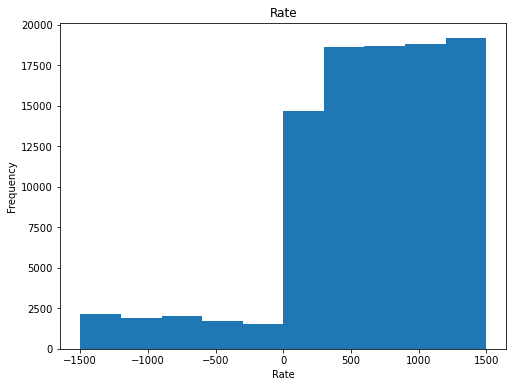

In [28]:
plt.figure(figsize=(8,6))
plt.hist(customer_final['Rate'])
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Rate')
plt.show()

### Tax

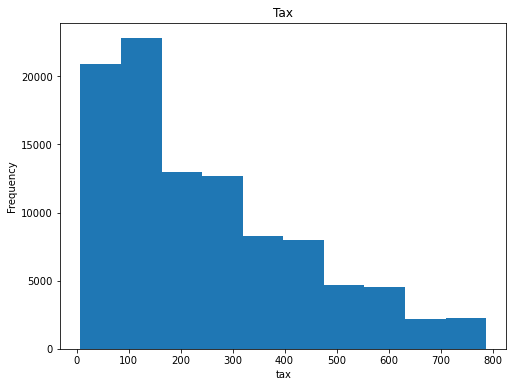

In [29]:
plt.figure(figsize=(8,6))
plt.hist(customer_final['Tax'])
plt.xlabel('tax')
plt.ylabel('Frequency')
plt.title('Tax')
plt.show()

### Total Amount

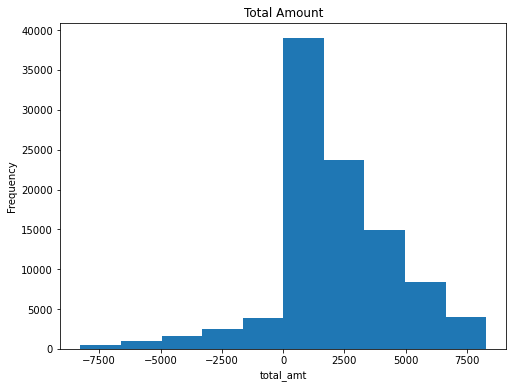

In [30]:
plt.figure(figsize=(8,6))
plt.hist(customer_final['total_amt'])
plt.xlabel('total_amt')
plt.ylabel('Frequency')
plt.title('Total Amount')
plt.show()

### Frequency Bar for Categorical variables 

Text(0.5, 1.0, 'Gender Countplot')

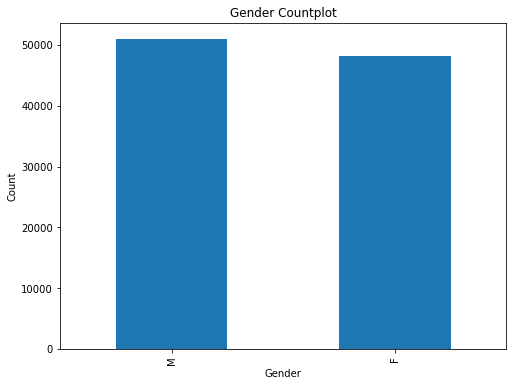

In [31]:
plt.figure(figsize=(8,6))
customer_final['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Countplot')

Text(0.5, 1.0, 'Store_type Countplot')

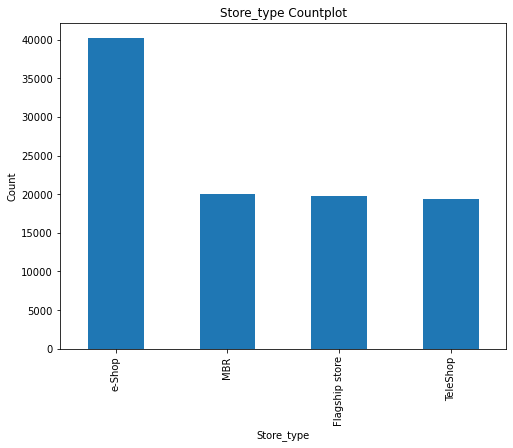

In [32]:
plt.figure(figsize=(8,6))
customer_final['Store_type'].value_counts().plot(kind='bar')
plt.xlabel('Store_type')
plt.ylabel('Count')
plt.title('Store_type Countplot')

Text(0.5, 1.0, 'prod_cat Countplot')

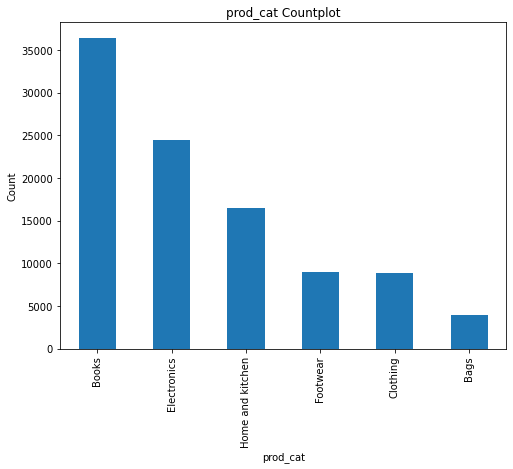

In [33]:
plt.figure(figsize=(8,6))
customer_final['prod_cat'].value_counts().plot(kind='bar')
plt.xlabel('prod_cat')
plt.ylabel('Count')
plt.title('prod_cat Countplot')

Text(0.5, 1.0, 'prod_subcat Countplot')

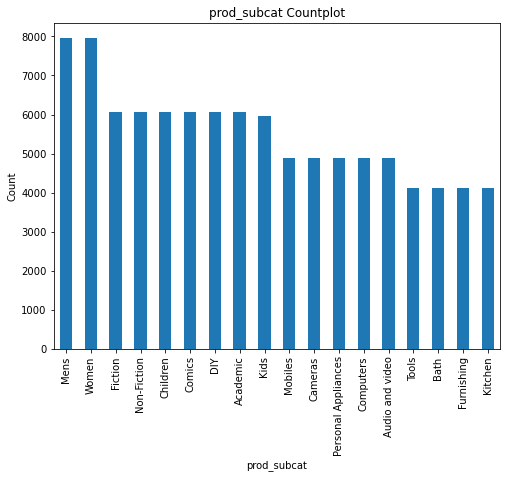

In [34]:
plt.figure(figsize=(8,6))
customer_final['prod_subcat'].value_counts().plot(kind='bar')
plt.xlabel('prod_subcat')
plt.ylabel('Count')
plt.title('prod_subcat Countplot')

### Time period of the available transaction data

In [37]:
customer_final['tran_date'] = customer_final['tran_date'].apply(dateutil.parser.parse)

In [38]:
print(customer_final['tran_date'].min())
print(customer_final['tran_date'].max())

2011-01-02 00:00:00
2014-12-02 00:00:00


### Count of transactions where the total amount of transaction was negative

In [39]:
customer_final.loc[customer_final['total_amt'] < 0,['total_amt']].count()[0]

9294

In [40]:
customer_final.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax',
       'total_amt', 'Store_type', 'prod_cat', 'prod_sub_cat_code',
       'prod_subcat'],
      dtype='object')

###  Analyze which product categories are more popular among females vs male customers.

In [41]:
df_grp =customer_final.groupby(['Gender','prod_cat'])[['prod_cat']].count()

In [42]:
df_grp.columns = ['prod_cat_count']

In [43]:
df_grp.reset_index(inplace=True)

In [44]:
df_grp.loc[df_grp['Gender'] == 'M'].sort_values(by=['prod_cat_count'],ascending=False).head(1)['prod_cat']

7    Books
Name: prod_cat, dtype: object

In [45]:
df_grp.loc[df_grp['Gender'] == 'F'].sort_values(by=['prod_cat_count'],ascending=False).head(1)['prod_cat']

1    Books
Name: prod_cat, dtype: object

### Which City code has the maximum customers and what was the percentage of customers from that city?

In [46]:
customer_final['city_code'].value_counts().nlargest(1)

4.0    10571
Name: city_code, dtype: int64

In [47]:
(customer_final['city_code'].value_counts(normalize=True)*100).nlargest(1)

4.0    10.65013
Name: city_code, dtype: float64

### Which store type sells the maximum products by value and by quantity?

In [48]:
customer_final['total_amt'].sum()

209966608.15

In [53]:
df_strtyp = customer_final.groupby(['Store_type']).agg({'total_amt':'sum','Qty':'sum'})

In [54]:
df_strtyp['total_amt'] = df_strtyp['total_amt'].round(2)

In [55]:
# By value and quantity
df_strtyp.sort_values(by=['total_amt','Qty'],ascending=False).head(1)

,total_amt,Qty
Store_type,,
e-Shop,85915747.84,98447


###  Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores

In [62]:
customer_final.loc[(customer_final['prod_cat'].isin(['Electronics','Clothing',])) & (customer_final['Store_type'] == 'Flagship store'),['total_amt']].sum()

total_amt    14658949.89
dtype: float64

### Total amount earned from "Male" customers under the "Electronics" category

In [66]:
customer_final.loc[(customer_final['Gender'] == 'M') & (customer_final['prod_cat'] == 'Electronics'),['total_amt']].sum().round(2)

total_amt    28515547.12
dtype: float64

###  How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [71]:
df_pos = customer_final[customer_final['total_amt'] > 0]

In [80]:
df_pos = df_pos.groupby(['customer_Id']).agg({'transaction_id':'nunique'}).reset_index()

In [83]:
df_pos.rename(columns={'transaction_id':'unique_count'},inplace=True)

In [90]:
print('customers having more than 10 unique transactions is',len(df_pos[df_pos['unique_count'] > 10]))

customers having more than 10 unique transactions is 6


### customers aged between 25 - 35

In [94]:
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'],format='%d-%m-%Y')

In [102]:
customer_final['birth_year'] =  pd.to_datetime(customer_final['DOB']).dt.year

In [106]:
curr_year = pd.to_datetime('today').year

In [122]:
customer_final['age'] = curr_year - customer_final['birth_year']

In [127]:
cs2535 = customer_final[customer_final['age'].between(25,35)]

### a. total amount spent for “Electronics” and “Books” product categories?


In [129]:
cs2535.loc[cs2535['prod_cat'].isin(['Electronics','Books']),['total_amt']].sum().round(2)

total_amt    21751521.68
dtype: float64

### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014

In [134]:
cs2535.loc[(cs2535['tran_date'] >= '2014-01-01') & (cs2535['tran_date'] <= '2014-03-01'),['total_amt']].sum()

total_amt    1292573.75
dtype: float64